## Алгоритм поиска загаданного числа
Исходя из условий задачи, известен отрезок, которому принадлежит загаданное число. По правилам игры в случае неудачной попытки результатом является установление отношения порядка между загаданным и предложенным числами.
Или другими словами, становится известно: больше ли предложенное число, чем загаданное, или меньше.

Данный факт позволяет мысленно разделить исходный интервал на два множества: множество, содержащее загаданное число, и множество, которое его не содержит. Тем самым, позволяя сократить отрезок, содержащий загаданное число. Предложенное число, в свою очередь, в зависимости от отношения порядка становится левым или правым пределом нового отрезка. Для оптимизации алгоритма в качестве предполагаемого числа следует выбирать элемент, являющийся серединой рассматриваемого отрезка. Повторяя данный подход, можно добиться максимальной скорости поиска загаданного числа.

## Немного теории
Данный подход в научной литературе называется [методом дихотомии или бинарным поиском](https://ru.wikipedia.org/wiki/Двоичный_поиск). Вычислительная сложность этого алгоритма применительно к нашей задаче можно оценить как O(Log(100)). Это означает, что максимальное количество попыток ограничено сверху:
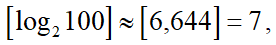
где **[*x*]** - округление *x* до целого числа в большую сторону.

Теоретическая проработанность бинарного поиска позволяет определить среднее количество попыток, требующихся для отгадывания случайного числа от 1 до 100.
Исходим из тех соображений, что загаданное число распределено равномерно на отрезке [1, 100]. Следовательно:
- вероятность угадать с первой попытки *P(1)=1/100=0.01*, так как в этом случае загаданное число равно 50;
- вероятность угадать со второй попытки *P(2)=2/100=0.02*, так как в этом случае имеем два эквивалентных числа;
- вероятность угадать с третьей попытки *P(3)=4/100=0.04*, так как в этом случае имеем 4 эквивалентных числа;
- вероятность угадать с четвёртой попытки *P(4)=8/100=0.08*, так как в этом случае имеем 8 эквивалентных чисел;
- вероятность угадать с пятой попытки *P(5)=16/100=0.16*, так как в этом случае имеем 16 эквивалентных чисел;
- вероятность угадать с шестой попытки *P(6)=32/100=0.32*, так как в этом случае имеем 32 эквивалентных числа;
- вероятность угадать с седьмой попытки *P(7)=37/100=0.37*, так как в этом случае имеем 37 оставшихся чисел: 100-1-2-4-8-16-32=37.

Тогда среднее количество попыток или, другими словами, **математическое ожидание** можно выразить в виде формулы:


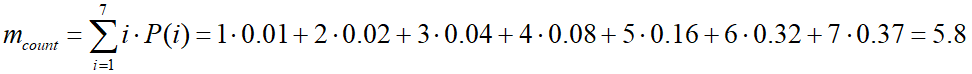
Давайте сравним результат, полученный аналитическим методом, с практикой :)

In [6]:
import numpy as np


def binary_search(number):
    '''Функция бинарного поиска загаданного числа'''
    count = 1   # счётчик попыток
    pivot = 50  # опорный элемент
    left = 1    # левый предел
    right = 100 # правый предел
    
    while number!=pivot:
        count += 1
        if number>pivot: 
            left = pivot
            delta = right - left
            pivot += delta//2 + delta%2
        elif number<pivot: 
            right = pivot
            delta = right - left
            pivot -= delta//2 + delta%2
            
    return(count) # выход из цикла, если угадали
        
        
def score_game(game_core):
    '''Запускаем игру 1000 раз, чтобы узнать, как быстро игра угадывает число'''
    count_list = []
    np.random.seed(1)  # фиксируем RANDOM SEED, чтобы наш эксперимент был воспроизводим!
    random_array = np.random.randint(1, 101, size=1000)
    for number in random_array:
        count_list.append(game_core(number))
    
    score = int(np.mean(count_list))
    print(f"Мой алгоритм угадывает число в среднем за {score} попыток")
    
    return(score)


score_game(binary_search)

Мой алгоритм угадывает число в среднем за 5 попыток


5

## Пояснения по программе
Вышеуказанный скрипт содержит 2 функции:
- функция ```score_game```, в качестве аргумента которой используется другая функция;
- функция ```binary_search```, принимающая на вход загаданное число.

Определение и назначение функции ```score_game``` практически ничем не отличается от того, что было предложено в обучающих примерах.
В свою очередь функция ```binary_search``` является центральной функцией скрипта. Она реализует алгоритм бинарного поиска. В качестве центральных переменных функции используются переменные:
- ```count``` - данная переменная является счётчиком, который увеличивается на 1 с каждой неудачной попыткой;
- ```pivot``` - переменная, соответствующая опорному элементу (предполагаемому числу), которая в начале алгоритма принимает значение равное половине отрезка - 50;
- ```left``` - переменная, соответствующая левой границе интервала поиска;
- ```right``` - переменная, соответствующая правой границе интервала поиска.

Последовательность поиска загаданного числа осуществляется с помощью цикла ```while```, который выполняется до тех пор, пока выражение ```number!=pivot``` истинно. В теле цикла загаданное число сравнивается с опорным элементом, хранящемся в переменной ```pivot```. Если загаданное число больше, то левая граница отрезка приравнивается значению переменной ```pivot```. В противном случае - правая граница принимает значение опорного элемента. Затем значение опорного элемента обновляется, как середина нового отрезка. Далее, итерация повторяется снова и до тех пор, пока выражение ```number!=pivot``` не станет ложным.

Заключительным шагом скрипта является вызов функции ```score_game``` с аргументом ```binary_search```.

Данная реализация не претендует на уникальность и новизну ([в интернете много подобных алгоритмов](https://www.geeksforgeeks.org/binary-search/)), но она вполне работоспособна при данной постановке задачи. Тем не менее, алгоритм вполне может быть улучшен путём автоматического расчёта первоначального значения переменной ```pivot```, также можно передавать границы отрезка как параметры функции.. Одним словом - нет предела совершенству!

## Анализ результатов
Первое, на что следует обратить внимание, это константная затравка для генератора случайных чисел: ```np.random.seed(1)```. Скорее всего, это сделано для того, чтобы мы были в равном положении и имели один и тот же случайный список элементов.

Дополнительно, как видно из полученных результатов, среднее количество попыток равно 5.
Тем не менее, я считаю, что так округлять *нехорошо*. Поскольку в строчке № 33 в переменную ```score``` заносится целое значение от результата фукнции ```np.mean(count_ls)```, используя функцию ```int```. Если вывести непосредственно результат фукнции ```np.mean(count_ls)```, можно получить следующий ответ:

что скорее ближе к цифре 6, нежели к 5.

Увеличивая длину списка ```random_array``` до 10000, получим:


Увеличивая в дальнейшем длину списка ещё в 10 раз, можно получить результат, хорошо согласующийся с аналитическим решением:



Так или иначе, составители курса, полагаю, намеренно сделали округление в меньшую сторону, потому как знают больше нашего. И я надеюсь, что в дальнейшем пойму, зачем так было сделано :)
## Спасибо за Внимание!